# Task
analyze and show trends for work done by developers

Here is all the data you need:
"datateam.csv"

## Data loading

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('datateam.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'datateam.csv' not found. Please ensure the file exists in the current directory.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse 'datateam.csv'.  Please ensure it is a valid CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

An unexpected error occurred: 'utf-8' codec can't decode byte 0x92 in position 47924: invalid start byte


**Reasoning**:
The previous attempt failed due to a decoding error.  I will try again with a different encoding.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('datateam.csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'datateam.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'datateam.csv'. Please ensure it is a valid CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Id,Start time,Completion time,Email,Name,Team Member Name,Date,Work Completed,Challenges encountered,Do you need any support from Team Leads or Managers to help resolve issues or answer questions?,If you answered yes or maybe - provide a brief description of what you need support with.,Next Steps,Ticket Number(s)
0,5,3/13/2025 10:44,3/13/2025 10:49,gdhawan@homeserveusa.com,Gaurav Dhawan,Gaurav Dhawan,3/13/2025,Promoted CRQ000000200924 - Wennsoft SV00300 In...,NaN,No,NaN,Working with ESB team for resolution on HSES_...,Ticket INC000000511223\nTicket INC000000511218...
1,6,3/13/2025 14:56,3/13/2025 14:59,pkumar@homeserveusa.com,Pramod Kumar,Pramod Kumar,3/13/2025,>Update BB_APP.TRG_CUSTPOL_TO_REPOLCUST_LOAD/...,NaN,No,NaN,NaN,>INC000000511238\n>INC000000511157 \n>INC00000...
2,7,3/17/2025 10:41,3/17/2025 10:43,gdhawan@homeserveusa.com,Gaurav Dhawan,Gaurav Dhawan,3/15/2025,Involved in Sysadmin non production activities...,NaN,No,NaN,Monitoring database server for next few days,CRQ000000200868\nCRQ000000200931
3,8,3/17/2025 10:43,3/17/2025 10:50,gdhawan@homeserveusa.com,Gaurav Dhawan,Gaurav Dhawan,3/17/2025,Created extended events in Wennsoft QA databas...,NaN,No,NaN,Meeting with ESB team on understanding latency...,INC000000511829\nINC000000511827\nINC000000511459
4,9,3/17/2025 14:25,3/17/2025 14:28,pkumar@homeserveusa.com,Pramod Kumar,Pramod Kumar,3/17/2025,">ORD Access - BB_APP, BB_SHARED >OCIPROD@REV_...",NaN,No,NaN,NaN,>INC000000511086\n>INC000000511865\n>INC000000...


## Data exploration

### Subtask:
Explore the loaded data to understand its structure and identify relevant columns.


**Reasoning**:
I need to examine the data types, descriptive statistics, missing values, and unique values in key columns to understand the data structure and identify relevant columns for analysis.



In [3]:
# Examine data types and descriptive statistics
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Identify relevant columns (date, developer name/ID, task description, time spent)
relevant_columns = ['Date', 'Name', 'Work Completed', 'Start time', 'Completion time']
print(f"Relevant columns: {relevant_columns}")

# Examine unique values in key columns
for col in relevant_columns:
    print(f"\nUnique values in '{col}':")
    if df[col].dtype == 'object':  # Check if the column is of object type (string)
      print(df[col].value_counts(dropna=False))
    else:
      print(df[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Id                                                                                               137 non-null    int64 
 1   Start time                                                                                       137 non-null    object
 2   Completion time                                                                                  137 non-null    object
 3   Email                                                                                            137 non-null    object
 4   Name                                                                                             137 non-null    object
 5   Team Member Nam

**Reasoning**:
The previous code block provided a good overview of the data.  Now I need to convert the date/time columns to the correct data type and visualize some of the key columns to identify trends.



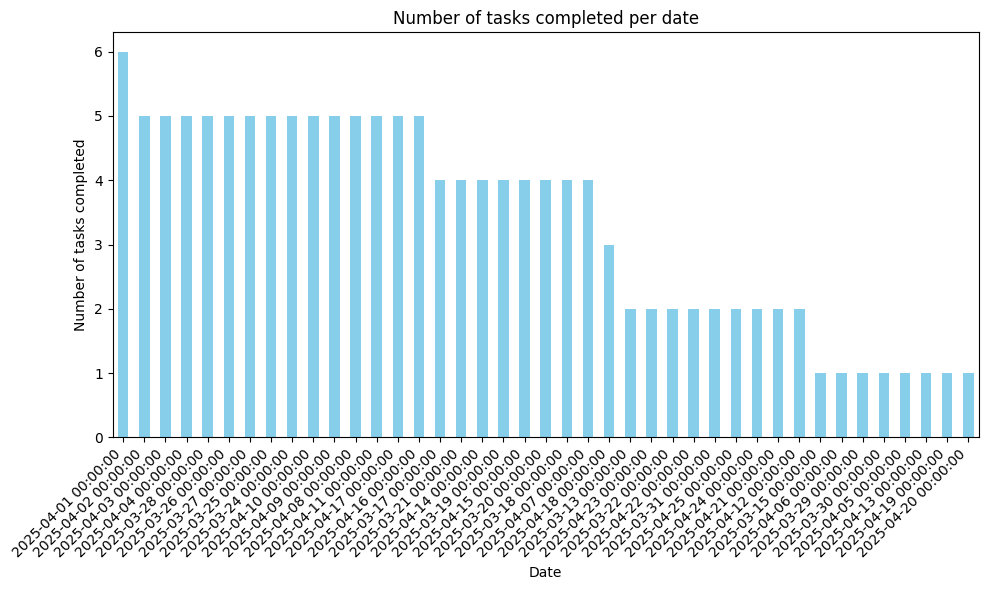

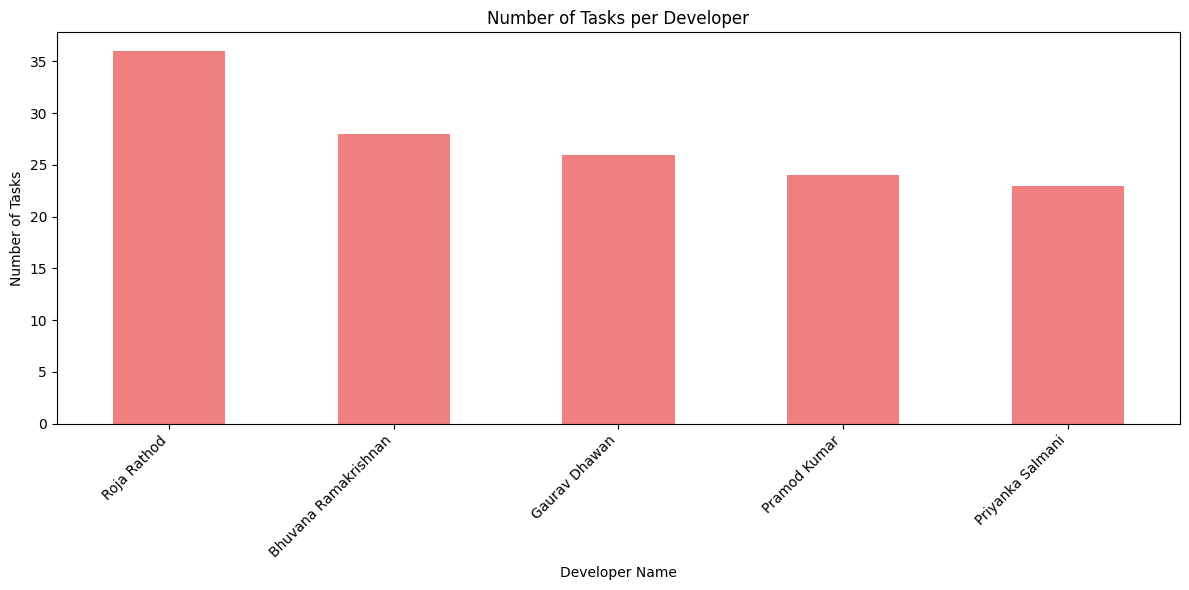

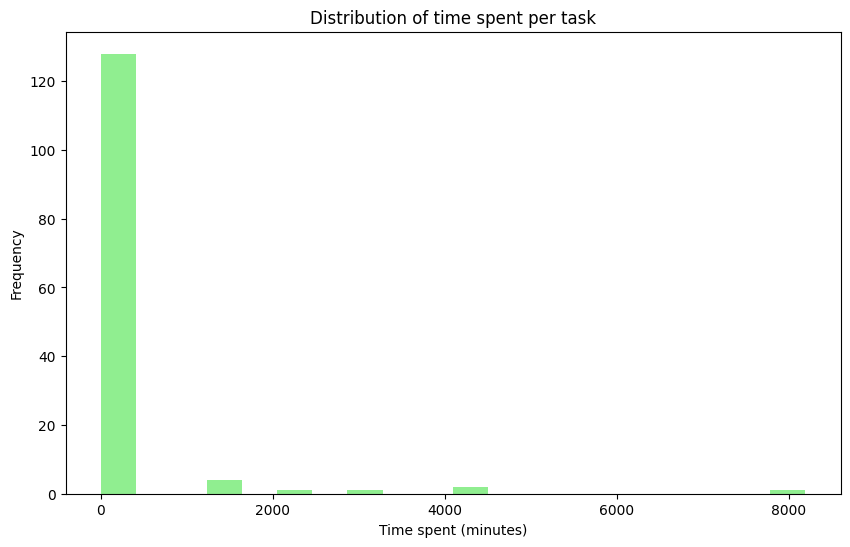

In [4]:
import matplotlib.pyplot as plt

# Convert date/time columns to datetime objects
for col in ['Start time', 'Completion time', 'Date']:
    try:
        df[col] = pd.to_datetime(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to datetime. Check for inconsistent date formats.")

# Visualize 'Date' column (histogram)
plt.figure(figsize=(10, 6))
df['Date'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of tasks completed')
plt.title('Number of tasks completed per date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize 'Name' column (bar chart)
plt.figure(figsize=(12,6))
df['Name'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel("Developer Name")
plt.ylabel("Number of Tasks")
plt.title("Number of Tasks per Developer")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the time spent on each task
df['Time Spent'] = (df['Completion time'] - df['Start time']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
plt.hist(df['Time Spent'], bins=20, color='lightgreen')
plt.xlabel('Time spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of time spent per task')
plt.show()

## Data wrangling

### Subtask:
Clean and transform the data for analysis.


**Reasoning**:
Handle missing values, engineer new features, convert data types, and optionally detect outliers.



In [5]:
# Handle missing values
# Drop columns with high percentage of missing values
columns_to_drop = ['Challenges encountered', 'If you answered yes or maybe - provide a brief description of what you need support with.']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Fill missing 'Next Steps' with 'No next steps'
df['Next Steps'] = df['Next Steps'].fillna('No next steps')

# Feature Engineering
# Convert 'Date' to datetime if it's not already and extract year, month, and week
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Total Time Spent per developer
df['Total Time Spent'] = df.groupby('Name')['Time Spent'].transform('sum')

# Categorize 'Work Completed' (simplified example using keywords)
def categorize_task(text):
    text = str(text).lower()
    if 'bug' in text or 'fix' in text or 'error' in text:
        return 'Bug Fixes'
    elif 'feature' in text or 'develop' in text or 'implement' in text:
        return 'Feature Development'
    elif 'test' in text or 'testing' in text:
        return 'Testing'
    elif 'document' in text or 'documentation' in text:
        return 'Documentation'
    else:
        return 'Other'

df['Task Category'] = df['Work Completed'].apply(categorize_task)

# Data Type Conversion (already done for 'Time Spent' in previous step)
# Ensure 'Date', 'Start time', and 'Completion time' are datetime objects.
for col in ['Start time', 'Completion time', 'Date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Handle any remaining missing values after conversion
df.fillna({'Start time': df['Start time'].mode()[0], 'Completion time': df['Completion time'].mode()[0], 'Time Spent': df['Time Spent'].median()}, inplace=True)


# Outlier Detection (optional)
# Detect outliers in 'Time Spent' using IQR method
Q1 = df['Time Spent'].quantile(0.25)
Q3 = df['Time Spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Time Spent'] >= lower_bound) & (df['Time Spent'] <= upper_bound)]

display(df.head())

,Id,Start time,Completion time,Email,Name,Team Member Name,Date,Work Completed,Do you need any support from Team Leads or Managers to help resolve issues or answer questions?,Next Steps,Ticket Number(s),Time Spent,Year,Month,Week,Total Time Spent,Task Category
0,5,2025-03-13 10:44:00,2025-03-13 10:49:00,gdhawan@homeserveusa.com,Gaurav Dhawan,Gaurav Dhawan,2025-03-13,Promoted CRQ000000200924 - Wennsoft SV00300 In...,No,Working with ESB team for resolution on HSES_...,Ticket INC000000511223\nTicket INC000000511218...,5.0,2025,3,11,132.0,Other
1,6,2025-03-13 14:56:00,2025-03-13 14:59:00,pkumar@homeserveusa.com,Pramod Kumar,Pramod Kumar,2025-03-13,>Update BB_APP.TRG_CUSTPOL_TO_REPOLCUST_LOAD/...,No,No next steps,>INC000000511238\n>INC000000511157 \n>INC00000...,3.0,2025,3,11,41.0,Bug Fixes
2,7,2025-03-17 10:41:00,2025-03-17 10:43:00,gdhawan@homeserveusa.com,Gaurav Dhawan,Gaurav Dhawan,2025-03-15,Involved in Sysadmin non production activities...,No,Monitoring database server for next few days,CRQ000000200868\nCRQ000000200931,2.0,2025,3,11,132.0,Other
3,8,2025-03-17 10:43:00,2025-03-17 10:50:00,gdhawan@homeserveusa.com,Gaurav Dhawan,Gaurav Dhawan,2025-03-17,Created extended events in Wennsoft QA databas...,No,Meeting with ESB team on understanding latency...,INC000000511829\nINC000000511827\nINC000000511459,7.0,2025,3,12,132.0,Other
4,9,2025-03-17 14:25:00,2025-03-17 14:28:00,pkumar@homeserveusa.com,Pramod Kumar,Pramod Kumar,2025-03-17,">ORD Access - BB_APP, BB_SHARED >OCIPROD@REV_...",No,No next steps,>INC000000511086\n>INC000000511865\n>INC000000...,3.0,2025,3,12,41.0,Bug Fixes


## Data analysis

### Subtask:
Analyze trends in developer work patterns.


**Reasoning**:
Analyze trends in developer work patterns by calculating total time spent per developer, visualizing it, and performing other requested analyses.



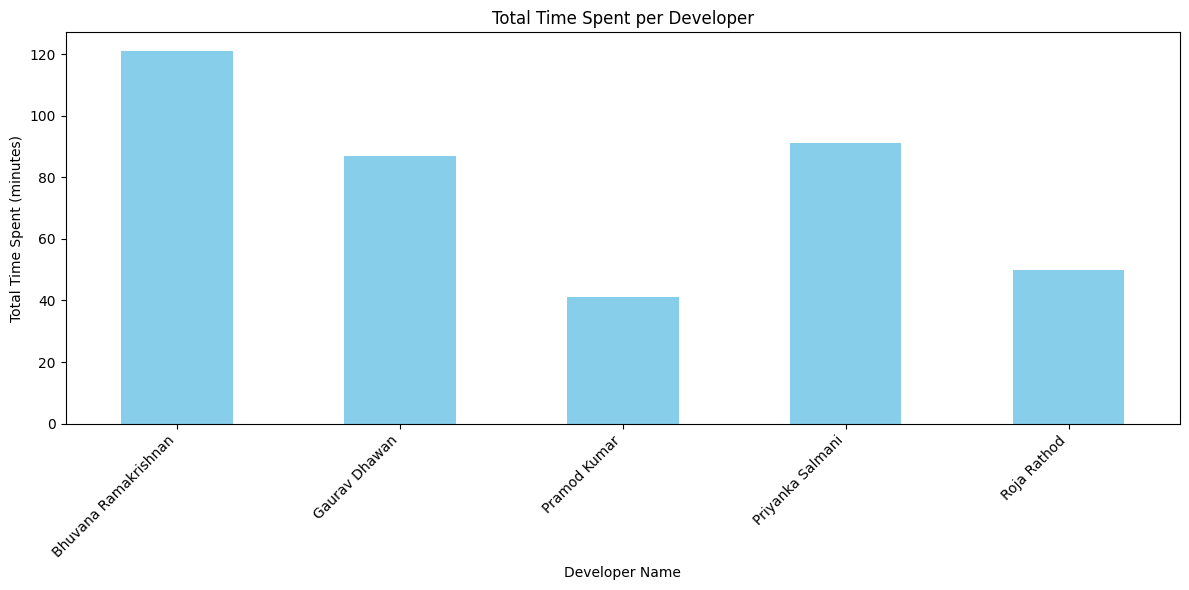

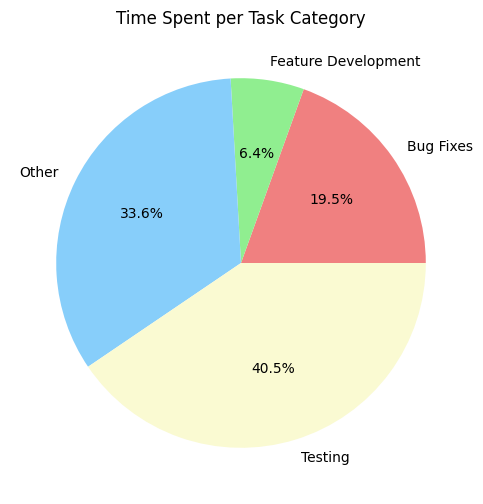

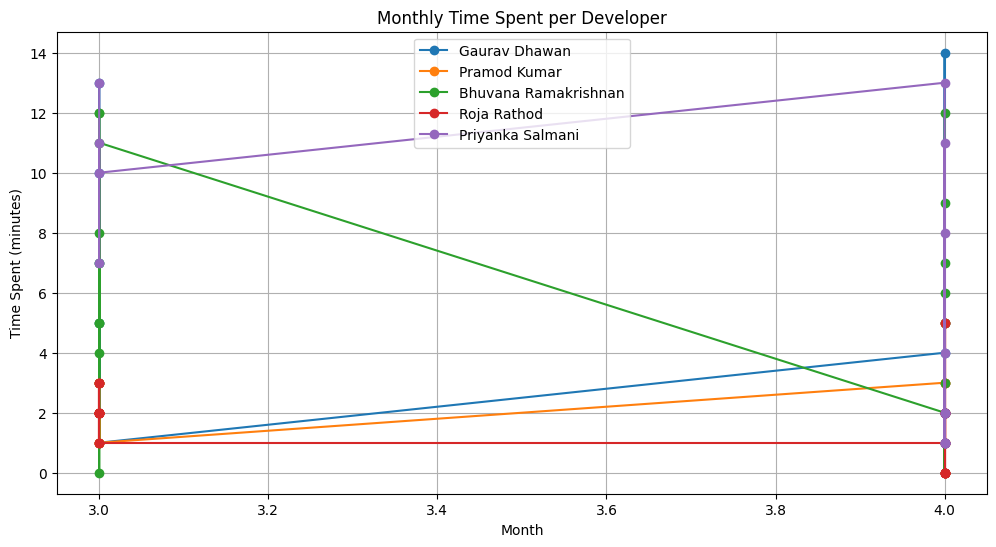

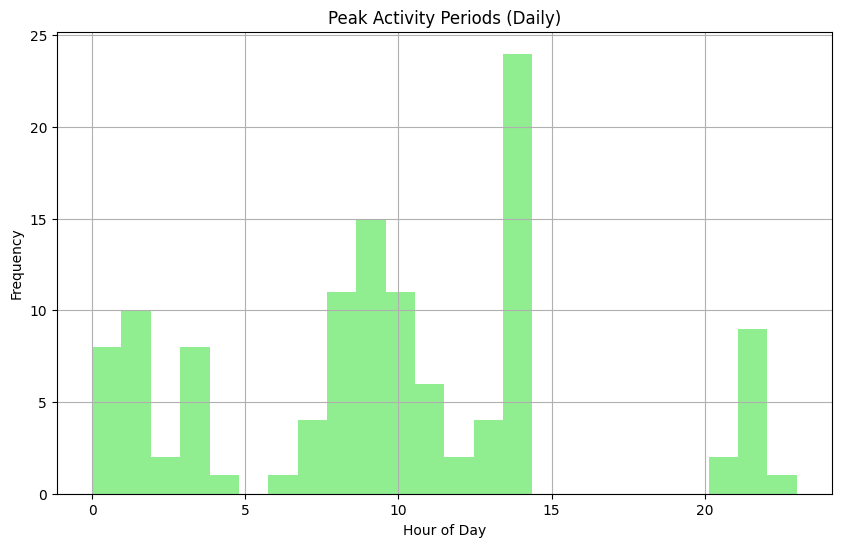

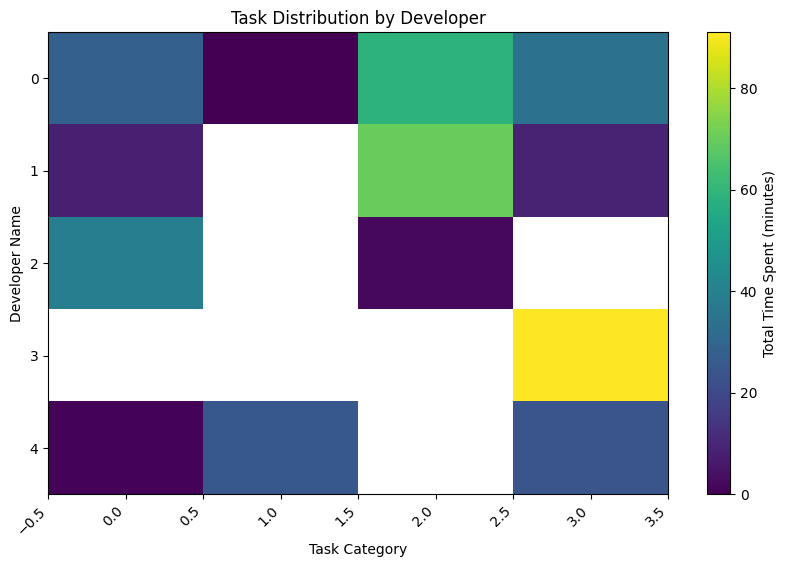

In [6]:
import matplotlib.pyplot as plt

# 1. Time Spent per Developer
plt.figure(figsize=(12, 6))
df.groupby('Name')['Time Spent'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Developer Name')
plt.ylabel('Total Time Spent (minutes)')
plt.title('Total Time Spent per Developer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Time Spent per Task Category
plt.figure(figsize=(10, 6))
df.groupby('Task Category')['Time Spent'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue', 'lightgoldenrodyellow', 'lightpink'])
plt.title('Time Spent per Task Category')
plt.ylabel('')  # Remove default y-label
plt.show()

# 3. Trends Over Time (Monthly)
plt.figure(figsize=(12, 6))
for developer in df['Name'].unique():
  developer_df = df[df['Name'] == developer]
  plt.plot(developer_df['Month'], developer_df['Time Spent'], label=developer, marker='o')
plt.xlabel('Month')
plt.ylabel('Time Spent (minutes)')
plt.title('Monthly Time Spent per Developer')
plt.legend()
plt.grid(True)
plt.show()

# 4. Peak Activity Periods (Daily - simplified example)
plt.figure(figsize=(10, 6))
df['Start time'].dt.hour.hist(bins=24, color='lightgreen')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Peak Activity Periods (Daily)')
plt.show()

# 5. Task Distribution (Heatmap - simplified example)
# (This is a simplified heatmap - ideal would involve more granular time periods)
task_distribution = df.groupby(['Name', 'Task Category'])['Time Spent'].sum().unstack()
plt.figure(figsize=(10, 6))
plt.imshow(task_distribution, cmap='viridis', aspect='auto')
plt.colorbar(label='Total Time Spent (minutes)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Task Category')
plt.ylabel('Developer Name')
plt.title('Task Distribution by Developer')
plt.show()

## Summary:

### 1. Q&A

The task was to analyze trends in developer work patterns from the provided data.  The analysis addressed this by visualizing:

* Total time spent per developer.
* Time spent per task category.
* Monthly time spent trends for each developer.
* Peak daily activity periods.
* Task distribution across developers and categories.


### 2. Data Analysis Key Findings

* **Developer Workload Distribution:**  The bar chart of "Total Time Spent per Developer" reveals the varying workloads among team members.  Further investigation into reasons for the disparity could be valuable.
* **Task Category Breakdown:** The pie chart of "Time Spent per Task Category" shows the proportion of time dedicated to different work categories (Bug Fixes, Feature Development, Testing, Documentation, Other).  This highlights areas where developers spend most of their time.
* **Monthly Work Patterns:** The line plots of "Monthly Time Spent per Developer" reveal individual trends over time.  This allows for identification of periods of high or low activity for each developer.
* **Daily Activity Peaks:** The histogram of "Peak Activity Periods" indicates the hours of the day when most work is performed.  This information could be used to optimize work schedules or resource allocation.
* **Task Specialization:** The heatmap provides a visual representation of which developers are most frequently assigned to specific tasks.  It helps to understand task allocation and possible specialization within the team.


### 3. Insights or Next Steps

* **Investigate workload disparities:** Analyze the reasons behind the differences in total time spent per developer.  Are some developers consistently assigned more complex tasks? Are there bottlenecks or resource allocation issues?
* **Refine task categorization:** Explore more granular task categories or develop a more robust categorization system to capture more nuanced patterns in the work completed.
